In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import string
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, classification_report

In [2]:
df = pd.read_csv('products_final.csv', header=0,index_col=0)
df.head()

,brand,name,price,price_sign,currency,image_link,product_link,website_link,description,rating,...,product_colors/29/hex_value,product_colors/29/colour_name,product_colors/30/hex_value,product_colors/30/colour_name,product_colors/31/hex_value,product_colors/31/colour_name,product_colors/32/hex_value,product_colors/32/colour_name,product_colors/33/hex_value,product_colors/33/colour_name
id,,,,,,,,,,,,,,,,,,,,,
1048,colourpop,Lippie Pencil,5.0,$,CAD,https://cdn.shopify.com/s/files/1/1338/0845/co...,https://colourpop.com/collections/lippie-pencil,https://colourpop.com,Lippie Pencil A long-wearing and high-intensit...,NaN,...,#B5716A,Brink Pencil,#B0516F,I Heart This Pencil,#542328,Ellarie Pencil,#DFAC9B,Toy Pencil,#AB7164,BFF Pencil 2
1047,colourpop,Blotted Lip,5.5,$,CAD,https://cdn.shopify.com/s/files/1/1338/0845/pr...,https://colourpop.com/collections/lippie-stix?...,https://colourpop.com,Blotted Lip Sheer matte lipstick that creates ...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1046,colourpop,Lippie Stix,5.5,$,CAD,https://cdn.shopify.com/s/files/1/1338/0845/co...,https://colourpop.com/collections/lippie-stix,https://colourpop.com,"Lippie Stix Formula contains Vitamin E, Mango,...",NaN,...,#8F6557,Tootsi,#AF7564,Cookie,#AA4E79,Persuasion,#442A26,Pitch,#5C4761,Leather
1045,colourpop,No Filter Foundation,12.0,$,CAD,https://cdn.shopify.com/s/files/1/1338/0845/pr...,https://colourpop.com/products/no-filter-matte...,https://colourpop.com/products/no-filter-matte...,"Developed for the Selfie Age, our buildable fu...",NaN,...,#C29879,Dark 155,#B99179,Dark 160,#C39981,Dark 165,#B99078,Dark 170,#B6927D,Dark 175
1044,boosh,Lipstick,26.0,$,CAD,https://cdn.shopify.com/s/files/1/1016/3243/pr...,https://www.boosh.ca/collections/all,https://www.boosh.ca/,All of our products are free from lead and hea...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 931 entries, 1048 to 1
Data columns (total 86 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   brand                          919 non-null    object 
 1   name                           931 non-null    object 
 2   price                          917 non-null    float64
 3   price_sign                     368 non-null    object 
 4   currency                       368 non-null    object 
 5   image_link                     931 non-null    object 
 6   product_link                   931 non-null    object 
 7   website_link                   931 non-null    object 
 8   description                    906 non-null    object 
 9   rating                         340 non-null    float64
 10  category                       507 non-null    object 
 11  product_type                   931 non-null    object 
 12  tag_list/0/cruelty free        4 non-null      ob

# Data Cleaning
#For our analysis we use only two variables: product_type and description.

In [4]:
text_df = df[['product_type', 'description']]
text_df.head()

,product_type,description
id,,
1048,lip_liner,Lippie Pencil A long-wearing and high-intensit...
1047,lipstick,Blotted Lip Sheer matte lipstick that creates ...
1046,lipstick,"Lippie Stix Formula contains Vitamin E, Mango,..."
1045,foundation,"Developed for the Selfie Age, our buildable fu..."
1044,lipstick,All of our products are free from lead and hea...


In [5]:
#shape of data:
text_df.shape

(931, 2)

In [6]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 931 entries, 1048 to 1
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_type  931 non-null    object
 1   description   906 non-null    object
dtypes: object(2)
memory usage: 21.8+ KB


In [7]:
#missing values:
text_df.isnull().sum()

product_type     0
description     25
dtype: int64

In [8]:
text_df['description'][3]

'Physicians Formula Organic Wear Lash Boosting Mascara is the 1st Ever 100% Natural Lash Boosting formula enhances the appearance of \nlash length, thickness and volume for dramatic lashes instantly and \nlong-term.Additional Features:100% of the Total Ingredients are from Natural Origin.  44% of the Total Ingredients are from Organic Farming.  100% saw enhanced lashes INSTANLY!Delivers ingredients to the base of lashes for  best results!93% saw thicker & longer looking lashes instantly!  92% saw \nextended & fuller looking lashes after 4 weeks!  *Based on \nindividual perception of results of a panel of women wearing Organic \nWear Lash Boosting Mascara.Directions for Use: Sweep mascara brush from lash base to tips. Apply multiple coats for \nadded volume. Can easily be washed off with soap and water or removed \nwith Physicians Formula Eye Makeup Remover Pads or Lotions.Ingredients: Citrus Aurantium Dulcis (Orange) Fruit Water *, Glycerin, Iron Oxides, \nMicrocrystalline Cellulose, G

In [9]:
text_df['description'] = text_df['description'].astype(str)

C:\Users\sushi\AppData\Local\Temp/ipykernel_4196/4056036317.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_df['description'] = text_df['description'].astype(str)


In [10]:
print(text_df['description'].apply(lambda x: len(x.split(' '))).sum())

94809


In [11]:
text_df.dropna(subset=['description'], inplace=True)

C:\Users\sushi\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [12]:
text_df.isnull().sum()

product_type    0
description     0
dtype: int64

In [13]:
text_df['length'] = text_df['description'].apply(len)
text_df.head()

C:\Users\sushi\AppData\Local\Temp/ipykernel_4196/67013513.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_df['length'] = text_df['description'].apply(len)


,product_type,description,length
id,,,
1048,lip_liner,Lippie Pencil A long-wearing and high-intensit...,232
1047,lipstick,Blotted Lip Sheer matte lipstick that creates ...,146
1046,lipstick,"Lippie Stix Formula contains Vitamin E, Mango,...",188
1045,foundation,"Developed for the Selfie Age, our buildable fu...",492
1044,lipstick,All of our products are free from lead and hea...,357


In [14]:
text_df.product_type.unique()

array(['lip_liner', 'lipstick', 'foundation', 'eyeliner', 'eyeshadow',
       'blush', 'bronzer', 'mascara', 'eyebrow', 'nail_polish'],
      dtype=object)

In [15]:
##Grouping data to a smaller number of categories:
#We have 10 unique products and some of them we can group to one category. We can link 'eyeliner', 'eyeshadow', 'mascara', 'eyebrow' to one group called as 'eye_makeup'. We can apply the same to 'blush' and 'bronzer' as 'contour' and 'lipstick' with 'lip_liner' to 'lipstick'.

In [16]:
text_df.product_type.value_counts()

foundation     166
lipstick       154
eyeliner       148
mascara         92
eyeshadow       86
blush           78
bronzer         69
nail_polish     60
eyebrow         49
lip_liner       29
Name: product_type, dtype: int64

In [17]:
text_df.loc[text_df['product_type'].isin(['lipstick','lip_liner']),'product_type'] = 'lipstick'
text_df.loc[text_df['product_type'].isin(['blush','bronzer']),'product_type'] = 'contour'
text_df.loc[text_df['product_type'].isin(['eyeliner','eyeshadow','mascara','eyebrow']),'product_type'] = 'eye_makeup'

C:\Users\sushi\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [18]:
text_df.product_type.value_counts()

eye_makeup     375
lipstick       183
foundation     166
contour        147
nail_polish     60
Name: product_type, dtype: int64

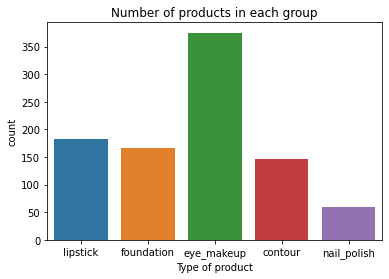

In [19]:
sns.countplot(x='product_type',data=text_df)
plt.xlabel('Type of product')
plt.title('Number of products in each group');

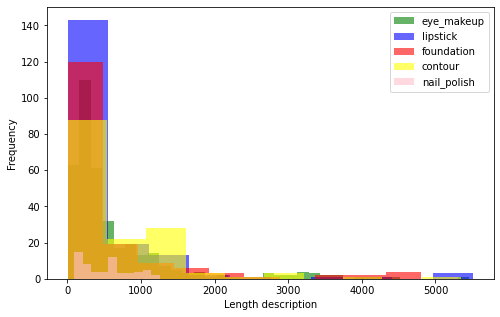

In [20]:
plt.figure(figsize=(8, 5))
text_df[text_df.product_type == 'eye_makeup'].length.plot(bins=35, kind='hist', color='green', label='eye_makeup', alpha=0.6)
text_df[text_df.product_type == 'lipstick'].length.plot(kind='hist', color='blue', label='lipstick', alpha=0.6)
text_df[text_df.product_type == 'foundation'].length.plot(kind='hist', color='red', label='foundation', alpha=0.6)
text_df[text_df.product_type == 'contour'].length.plot(kind='hist', color='yellow', label='contour', alpha=0.6)
text_df[text_df.product_type == 'nail_polish'].length.plot(kind='hist', color='pink', label='nail_polish', alpha=0.6)
plt.legend()
plt.xlabel("Length description");

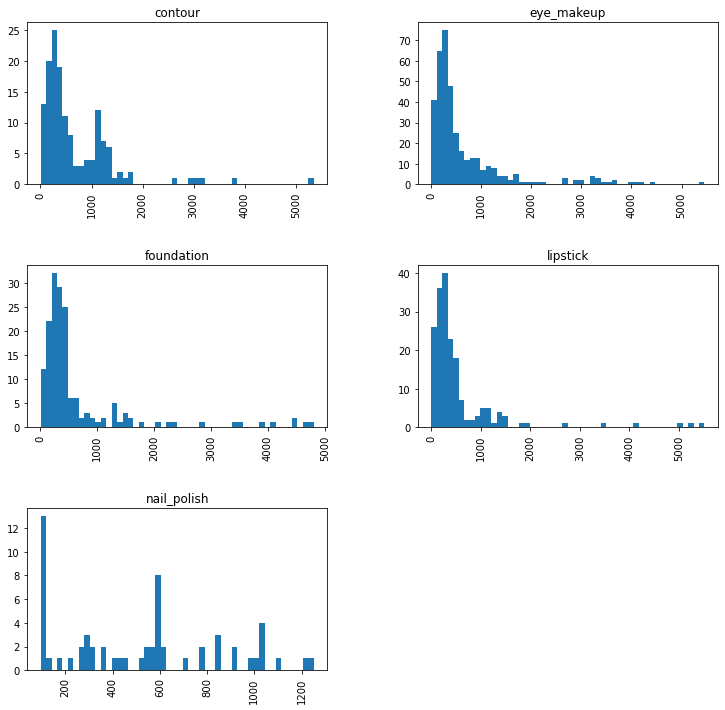

In [21]:
text_df.hist(column='length', by='product_type', bins=50,figsize=(12,12));

# Text Pre-processing
In this step we have to remove punctuation, stop words, bad characters and so on. The second step is aimed to convertion all of the words to lower case and then stemmed them using the Porter Stemmer in the NLTK package.

Stemming operation bundles together words of same root. E.g. stem operation bundles “fishing”, and “fished” into a common "fish".

The functions to clean text, remove stop words and apply stemming operation for each line of text:

In [22]:
stop = stopwords.words('english')
print(stop[::10])

porter = PorterStemmer()

['i', "you've", 'himself', 'they', 'that', 'been', 'a', 'while', 'through', 'in', 'here', 'few', 'own', 'just', 're', 'doesn', 'ma', "shouldn't"]


In [23]:
def remove_punctuation(description):
    """The function to remove punctuation"""
    table = str.maketrans('', '', string.punctuation)
    return description.translate(table)

def remove_stopwords(text):
    """The function to removing stopwords"""
    text = [word.lower() for word in text.split() if word.lower() not in stop]
    return " ".join(text)

def stemmer(stem_text):
    """The function to apply stemming"""
    stem_text = [porter.stem(word) for word in stem_text.split()]
    return " ".join(stem_text)

In [24]:
text_df['description'] = text_df['description'].apply(remove_punctuation)
text_df['description'] = text_df['description'].apply(remove_stopwords)
text_df['description'] = text_df['description'].apply(stemmer)

C:\Users\sushi\AppData\Local\Temp/ipykernel_4196/2218496831.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_df['description'] = text_df['description'].apply(remove_punctuation)
C:\Users\sushi\AppData\Local\Temp/ipykernel_4196/2218496831.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_df['description'] = text_df['description'].apply(remove_stopwords)
C:\Users\sushi\AppData\Local\Temp/ipykernel_4196/2218496831.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

In [25]:
text_df.head()

,product_type,description,length
id,,,
1048,lipstick,lippi pencil longwear highintens lip pencil gl...,232
1047,lipstick,blot lip sheer matt lipstick creat perfect pop...,146
1046,lipstick,lippi stix formula contain vitamin e mango avo...,188
1045,foundation,develop selfi age buildabl full coverag natur ...,492
1044,lipstick,product free lead heavi metal paraben phthalat...,357


In [26]:
text_df['description'][1]

'final natur mascara feel good put lash natur parabenfre glutenfre mercuryfre amaz well mascara build volum length lash natur mascara you’v wait foringredi aqua water oryza sativa wax rice bran wax olea europea fruit oil oliv oil veget sourc cetyl alcohol coconut coernica cerifera carnauba wax euphorbia cerifera candelilla wax veget glycerin stearic acid acacia gum black iron oxid ci 77499 aminomethyl popandiol ph adjust phenoxyethanol preserv'

# Pos Tagging
To get the deeper insight to the way in which that word is used in speech, the Part of speech (POS) tagging method has been used. There are eight primary parts of speech and they each have a corresponding tag. The NLTK libary has a method to perform POS tagging.

The example of Pos Tagging on analyzed data set is presented below:

In [28]:
tokens = text_df['description'][0]

nltk.pos_tag(word_tokenize(tokens))

KeyError: 0

# Bag of words
To run machine learning algorithms we need to convert the text files into numerical feature vectors. We will use bag of words model for our analysis. In general we segment each text file into words and count of times each word occurs in each document and finally assign each word an integer id. Each unique word in our dictionary will correspond to a feature (descriptive feature).

More precisely we will convert our text documents to a matrix of token counts (CountVectorizer), then transform a count matrix to a normalized tf-idf representation (tf-idf transformer).

# CountVectorizer


In [30]:

vectorizer = CountVectorizer()
vectorizer.fit(text_df['description'])
vector = vectorizer.transform(text_df['description'])

In [31]:
print(vector.shape)
print(vector.toarray())

(931, 5892)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


# TF-IDF
Term Frequency–Inverse Document Frequency

In [32]:
# extract the tfid representation matrix of the text data
tfidf_converter = TfidfTransformer()
X_tfidf = tfidf_converter.fit_transform(vector).toarray()
X_tfidf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [33]:
#Spliting the data into train and test sets:

X = text_df['description']
y = text_df['product_type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 0)

In [34]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((698,), (233,), (698,), (233,))

In [35]:
X_train

id
220     tri covergirl intensifi liquid liner get contr...
52      volum lengthen defin like pro covergirl profes...
1009    essenti lip gloss shade enrich blend natur org...
722     diorif reveal nail liner design decor nail lik...
694     born backstag expertis inspir profession techn...
                              ...                        
99      dr hauschka lipstick leav lip feel soft silki ...
855     wrap lip highimpact metal color liquid sued me...
334     mani women don’t need foundat everywher onebas...
413     anna sui lip colour stain includ tint ingredi ...
279     dare wear 24hr shadowmaybellin color tattoo cr...
Name: description, Length: 698, dtype: object

In [36]:
y_train

id
220      eye_makeup
52       eye_makeup
1009       lipstick
722     nail_polish
694      eye_makeup
           ...     
99         lipstick
855        lipstick
334      foundation
413        lipstick
279      eye_makeup
Name: product_type, Length: 698, dtype: object

# Logistic Regression
We build and train Logistic Regression model:

In [37]:
model_log = Pipeline([('vect', CountVectorizer(min_df=5, ngram_range=(1,2))),
                      ('tfidf', TfidfTransformer()),
                      ('model',LogisticRegression()),
                     ])

model_log.fit(X_train, y_train)

ytest = np.array(y_test)
pred = model_log.predict(X_test)

In [38]:
pred

array(['contour', 'contour', 'eye_makeup', 'eye_makeup', 'contour',
       'nail_polish', 'contour', 'eye_makeup', 'lipstick', 'contour',
       'contour', 'eye_makeup', 'nail_polish', 'contour', 'foundation',
       'foundation', 'eye_makeup', 'lipstick', 'eye_makeup', 'lipstick',
       'foundation', 'eye_makeup', 'eye_makeup', 'contour', 'lipstick',
       'eye_makeup', 'foundation', 'foundation', 'eye_makeup',
       'eye_makeup', 'foundation', 'foundation', 'eye_makeup',
       'eye_makeup', 'lipstick', 'eye_makeup', 'foundation', 'eye_makeup',
       'eye_makeup', 'eye_makeup', 'eye_makeup', 'lipstick', 'eye_makeup',
       'eye_makeup', 'eye_makeup', 'foundation', 'contour', 'contour',
       'foundation', 'lipstick', 'nail_polish', 'eye_makeup', 'lipstick',
       'eye_makeup', 'eye_makeup', 'contour', 'nail_polish',
       'nail_polish', 'eye_makeup', 'eye_makeup', 'foundation',
       'eye_makeup', 'foundation', 'contour', 'foundation', 'eye_makeup',
       'eye_makeup', 'fou

In [39]:
X_test

id
639                              “kick cheeks” blush kit
483    dr hauschka transluc bronz tint ideal use alon...
53     volum lengthen defin like pro covergirl profes...
21     100 natur botan base formula glide effortlessl...
502    make good thing better make bigger overs versi...
                             ...                        
875                                                  nan
137    transform mani uniqu transform effect top coat...
532    photo shoot crew can’t wait around makeup arti...
811    smear fade creas stay wash versatil creami for...
781    instant pickmeup skin sheer oilfre gel creat w...
Name: description, Length: 233, dtype: object

In [40]:
#The confusion matrix and classification report(precision, recall, F1-score):

print('accuracy %s' % accuracy_score(pred, y_test))
print(classification_report(ytest, pred))

accuracy 0.9055793991416309
              precision    recall  f1-score   support

     contour       1.00      0.88      0.93        40
  eye_makeup       0.85      0.98      0.91        91
  foundation       0.84      0.80      0.82        40
    lipstick       1.00      0.91      0.95        45
 nail_polish       1.00      0.82      0.90        17

    accuracy                           0.91       233
   macro avg       0.94      0.88      0.90       233
weighted avg       0.91      0.91      0.91       233



# SVM

In [41]:
svc = Pipeline([('vect', CountVectorizer(min_df=5, ngram_range=(1,2))),
               ('tfidf', TfidfTransformer()),
               ('model',LinearSVC()),
               ])

svc.fit(X_train, y_train)

ytest = np.array(y_test)
y_pred = svc.predict(X_test)

In [42]:
y_pred

array(['contour', 'contour', 'eye_makeup', 'eye_makeup', 'contour',
       'nail_polish', 'contour', 'eye_makeup', 'lipstick', 'contour',
       'contour', 'eye_makeup', 'nail_polish', 'contour', 'foundation',
       'foundation', 'eye_makeup', 'lipstick', 'eye_makeup', 'lipstick',
       'foundation', 'lipstick', 'eye_makeup', 'contour', 'lipstick',
       'eye_makeup', 'foundation', 'foundation', 'eye_makeup',
       'eye_makeup', 'foundation', 'foundation', 'eye_makeup',
       'eye_makeup', 'lipstick', 'eye_makeup', 'foundation', 'eye_makeup',
       'contour', 'eye_makeup', 'eye_makeup', 'lipstick', 'eye_makeup',
       'eye_makeup', 'eye_makeup', 'foundation', 'contour', 'contour',
       'foundation', 'lipstick', 'nail_polish', 'eye_makeup', 'lipstick',
       'eye_makeup', 'eye_makeup', 'contour', 'nail_polish',
       'nail_polish', 'eye_makeup', 'eye_makeup', 'foundation',
       'eye_makeup', 'foundation', 'contour', 'foundation', 'eye_makeup',
       'eye_makeup', 'contour'

In [45]:
X_test

id
639                              “kick cheeks” blush kit
483    dr hauschka transluc bronz tint ideal use alon...
53     volum lengthen defin like pro covergirl profes...
21     100 natur botan base formula glide effortlessl...
502    make good thing better make bigger overs versi...
                             ...                        
875                                                  nan
137    transform mani uniqu transform effect top coat...
532    photo shoot crew can’t wait around makeup arti...
811    smear fade creas stay wash versatil creami for...
781    instant pickmeup skin sheer oilfre gel creat w...
Name: description, Length: 233, dtype: object

In [46]:
print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(ytest, y_pred))

accuracy 0.927038626609442
              precision    recall  f1-score   support

     contour       1.00      0.93      0.96        40
  eye_makeup       0.90      0.97      0.93        91
  foundation       0.85      0.82      0.84        40
    lipstick       0.98      0.91      0.94        45
 nail_polish       1.00      1.00      1.00        17

    accuracy                           0.93       233
   macro avg       0.94      0.93      0.93       233
weighted avg       0.93      0.93      0.93       233

